<a href="https://colab.research.google.com/github/KhaledAlamin/Deep-learing/blob/main/CNN_Tensorflow_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install torch==1.4.0
!pip3 install torchvision==0.5.0
!pip3 install Pillow-SIMD
!pip3 install tqdm

     |████████████████████████████████| 753.4MB 22kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
     |████████████████████████████████| 4.0MB 7.7MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 634kB 8.4MB/s 
  Created wheel for Pillow-SIMD: filename=Pillow_SIMD-7.0.0.post3-cp36-cp36m-linux_x86_64.whl size=1110376 sha256=ea3b519fcdd9c646616577f2eeaac4c96300a25c862ac55068e9c0e17e3d597e
  Stored in directory: /root/.cache/pip/wheels/d3/ac/4f/4cdf8febba528e5f1b09fc58d5181e1c12ed1e8655dcd583b8
Successfully built Pillow-SIMD


In [3]:
import os
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset, DataLoader, ConcatDataset
from torch.backends import cudnn

import torchvision
from torchvision import transforms
from torchvision.models import alexnet

from PIL import Image
from tqdm import tqdm

In [4]:
# Define transforms for training phase
train_transform = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizes tensor with mean and standard deviation
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #normaliz values for transfer learning
])
# Define transforms for the evaluation phase
eval_transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_transform_agg1 = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.RandomHorizontalFlip(p=1),
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #normaliz values for transfer learning
                                      
])
train_transform_agg2 = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.ColorJitter(hue=.02, saturation=.02),
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #normaliz values for transfer learning
                                      
])
train_transform_agg3 = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.RandomRotation(degrees=40,),
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #normaliz values for transfer learning
                                      
])
train_transform_agg4 = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.RandomVerticalFlip(p=1),
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #normaliz values for transfer learning
                                      
])
train_transform_agg5 = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.RandomGrayscale(45),
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #normaliz values for transfer learning
                                      
])

In [5]:
# Clone github repository with data
if not os.path.isdir('./Caltech101'):
  !git clone https://github.com/KhaledAlamin/HW2_Caltech101
  !mv 'HW2_Caltech101' 'Caltech101'

Cloning into 'HW2_Caltech101'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 9271 (delta 6), reused 0 (delta 0), pack-reused 9259
Receiving objects: 100% (9271/9271), 129.49 MiB | 37.98 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (9149/9149), done.


In [6]:
!ls


Caltech101  sample_data


### create training, validation and testing datasets:

In [7]:
def train_val_split(dataset, validation_split):
    train_indexes = [] #2868
    val_indexes = [] #2916
    validation_split = validation_split

    df = pd.DataFrame(data = {'label_ind': dataset.label})

    for j in list(set(dataset.label)):
        x = df[df['label_ind'] == j].index.tolist()
        split = int(np.round(validation_split * len(x)))
        train = x[:split]
        val = x[split:]
        train_indexes = train_indexes + train
        val_indexes = val_indexes + val

    tr_dataset = Subset(dataset, train_indexes)
    val_dataset = Subset(dataset, val_indexes)

    return tr_dataset , val_dataset

#========================================================================================================================================

DATA_DIR = 'Caltech101/101_ObjectCategories'
from Caltech101.caltech_dataset import Caltech

train_dataset = Caltech(DATA_DIR, split='train',  transform=train_transform)
test_dataset = Caltech(DATA_DIR, split='test',  transform=train_transform)
tr_dataset , val_dataset = train_val_split(train_dataset, 0.5)

print('Train Dataset: {}'.format(len(tr_dataset)))            
print('Valid Dataset: {}'.format(len(val_dataset)))              
print('Test Dataset: {}'.format(len(test_dataset))) 

Train Dataset: 2893
Valid Dataset: 2891
Test Dataset: 2893


### Parameters:

In [8]:
DEVICE = 'cuda'      # 'cuda' or 'cpu'

NUM_CLASSES = 101    # 101 + 1: There is am extra Background class that should be removed 

BATCH_SIZE = 128     # Higher batch sizes allows for larger learning rates. An empirical heuristic suggests that, when changing
                     # the batch size, learning rate should change by the same factor to have comparable results

LR = 1e-3           # The initial Learning Rate
MOMENTUM = 0.9       # Hyperparameter for SGD, keep this at 0.9 when using SGD
WEIGHT_DECAY = 5e-2  # Regularization, you can keep this at the default

NUM_EPOCHS = 40      # Total number of training epochs (iterations over dataset)
STEP_SIZE = 23       # How many epochs before decreasing learning rate (if using a step-down policy)
GAMMA = 0.1          # Multiplicative factor for learning rate step-down

LOG_FREQUENCY = 10

### Dataloaders:

In [9]:
# Dataloaders iterate over pytorch datasets and transparently provide useful functions (e.g. parallelization and shuffling)
train_dataloader = DataLoader(tr_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

### 1. Training and Validation (No Transfer learning No data agumentation):

In [10]:
net = alexnet() # Loading AlexNet model
#net_TL = alexnet(pretrained=True)
# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes
# We need 101 outputs for Caltech-101
net.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer
                                                 # The convolutional layer is nn.Conv2d
#=========================================================================================================================

# Define loss function
criterion = nn.CrossEntropyLoss() # for classification, we use Cross Entropy

# Choose parameters to optimize
# To access a different set of parameters, you have to access submodules of AlexNet
# (nn.Module objects, like AlexNet, implement the Composite Pattern)
# e.g.: parameters of the fully connected layers: net.classifier.parameters()
# e.g.: parameters of the convolutional layers: look at alexnet's source code ;) 
parameters_to_optimize = net.parameters() # In this case we optimize over all the parameters of AlexNet

# Define optimizer
# An optimizer updates the weights based on loss
# We use SGD with momentum
optimizer = optim.SGD(parameters_to_optimize, lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

# Define scheduler
# A scheduler dynamically changes learning rate
# The most common schedule is the step(-down), which multiplies learning rate by gamma every STEP_SIZE epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

#=========================================================================================================================

# By default, everything is loaded to cpu
net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda

cudnn.benchmark # Calling this optimizes runtime

current_step = 0
running_corrects = 0
train_loss = []
# Start iterating over the epochs
for epoch in range(NUM_EPOCHS):
  epoch_loss = []
  #running_loss = 0.0
  print('Starting epoch {}/{}, LR = {}'.format(epoch+1, NUM_EPOCHS, scheduler.get_lr()))

  # Iterate over the dataset
  for images, labels, path, target in train_dataloader:
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    net.train() 

    optimizer.zero_grad() 

    outputs = net(images)

    loss = criterion(outputs, labels)

    # Log loss
    if (current_step % LOG_FREQUENCY == 0) and (current_step != 0):
      print('Step {}, Loss {}'.format(current_step, loss.item()))

    # Compute gradients for each layer and update weights
    loss.backward()  # backward pass: computes gradients
    optimizer.step() # update weights based on accumulated gradients

    epoch_loss.append(loss.item())
    current_step += 1

  train_loss.append(sum(epoch_loss)/len(epoch_loss))
  # Step the scheduler
  scheduler.step() 

Starting epoch 1/40, LR = [0.001]
Step 10, Loss 4.615811824798584
Step 20, Loss 4.611858367919922
Starting epoch 2/40, LR = [0.001]
Step 30, Loss 4.608363628387451
Step 40, Loss 4.609599590301514
Starting epoch 3/40, LR = [0.001]
Step 50, Loss 4.608042240142822
Step 60, Loss 4.598084449768066
Starting epoch 4/40, LR = [0.001]
Step 70, Loss 4.594718933105469
Step 80, Loss 4.590971946716309
Starting epoch 5/40, LR = [0.001]
Step 90, Loss 4.5901994705200195
Step 100, Loss 4.586103439331055
Starting epoch 6/40, LR = [0.001]
Step 110, Loss 4.588500022888184
Step 120, Loss 4.578463554382324
Step 130, Loss 4.578411102294922
Starting epoch 7/40, LR = [0.001]
Step 140, Loss 4.577127456665039
Step 150, Loss 4.567262172698975
Starting epoch 8/40, LR = [0.001]
Step 160, Loss 4.562177658081055
Step 170, Loss 4.576386451721191
Starting epoch 9/40, LR = [0.001]
Step 180, Loss 4.558971881866455
Step 190, Loss 4.543835163116455
Starting epoch 10/40, LR = [0.001]
Step 200, Loss 4.503408908843994
Step 21

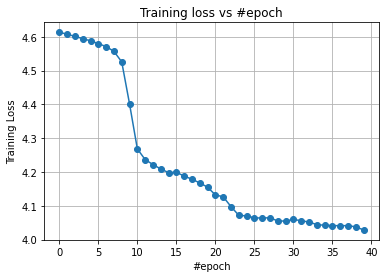

In [11]:
plt.plot(range(NUM_EPOCHS), train_loss, marker = 'o')
plt.title('Training loss vs #epoch')
plt.xlabel('#epoch')
plt.ylabel('Training Loss')
plt.grid()

In [12]:
net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda
net.train(False) # Set Network to evaluation mode

running_corrects = 0
for images, labels, path, target  in tqdm(val_dataloader):
  images = images.to(DEVICE)
  labels = labels.to(DEVICE)

  # Forward Pass
  outputs = net(images)

  # Get predictions
  _, preds = torch.max(outputs.data, 1)

  # Update Corrects
  running_corrects += torch.sum(preds == labels.data).data.item()

# Calculate Accuracy
accuracy_val = running_corrects / float(len(val_dataset))

print('Validation Accuracy: {}'.format(accuracy_val))

100%|██████████| 23/23 [00:10<00:00,  2.14it/s]

Validation Accuracy: 0.20996195088204772


### 2. Training and validation with transfer learning:

In [13]:
net = alexnet(pretrained=True) # Loading AlexNet model
#net_TL = alexnet(pretrained=True)
# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes
# We need 101 outputs for Caltech-101
net.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer
                                                 # The convolutional layer is nn.Conv2d

#=========================================================================================================================

# Define loss function
criterion = nn.CrossEntropyLoss() # for classification, we use Cross Entropy

# Choose parameters to optimize
# To access a different set of parameters, you have to access submodules of AlexNet
# (nn.Module objects, like AlexNet, implement the Composite Pattern)
# e.g.: parameters of the fully connected layers: net.classifier.parameters()
# e.g.: parameters of the convolutional layers: look at alexnet's source code ;) 
parameters_to_optimize = net.parameters() # In this case we optimize over all the parameters of AlexNet

# Define optimizer
# An optimizer updates the weights based on loss
# We use SGD with momentum
optimizer = optim.SGD(parameters_to_optimize, lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

# Define scheduler
# A scheduler dynamically changes learning rate
# The most common schedule is the step(-down), which multiplies learning rate by gamma every STEP_SIZE epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

#=========================================================================================================================

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [14]:
# By default, everything is loaded to cpu
net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda

cudnn.benchmark # Calling this optimizes runtime

current_step = 0
running_corrects_tr = 0
running_corrects_val = 0

train_loss_TL = []
train_acc_TL = []
val_loss_TL = []
val_acc_TL = []

# Start iterating over the epochs
for epoch in range(NUM_EPOCHS):
  epoch_loss_tr = []
  epoch_loss_val = []
  running_corrects_tr = 0
  running_corrects_val = 0
  
  print('Starting epoch {}/{}, LR = {}'.format(epoch+1, NUM_EPOCHS, scheduler.get_lr()))

  # Iterate over the dataset
  net = net.to(DEVICE)
  net.train()
  for images, labels, path, target  in train_dataloader: 
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    net.train() 
    optimizer.zero_grad() 
    outputs = net(images)
    loss = criterion(outputs, labels)

    # Compute gradients for each layer and update weights
    loss.backward()  # backward pass: computes gradients
    optimizer.step() # update weights based on accumulated gradients

    epoch_loss_tr.append(loss.item())

    _, preds = torch.max(outputs.data, 1)
    running_corrects_tr += torch.sum(preds == labels.data).data.item()

  train_loss_TL.append(sum(epoch_loss_tr)/len(epoch_loss_tr))
  train_acc_TL.append(running_corrects_tr/float(len(tr_dataset)))

  net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda
  net.train(False) # Set Network to evaluation mode

  for images, labels, path, target  in val_dataloader:
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)
    # Forward Pass
    outputs = net(images)
    # loss calculation:
    epoch_loss_val.append(loss.item())
    # Get predictions
    _, preds = torch.max(outputs.data, 1)
    # Update Corrects
    running_corrects_val += torch.sum(preds == labels.data).data.item()
  # Calculate Loss & Accuracy per epoch:
  val_loss_TL.append(sum(epoch_loss_val)/len(epoch_loss_val))
  val_acc_TL.append(running_corrects_val / float(len(val_dataset)))

  print('Train: Loss = {} , Accuracy = {}'.format( (sum(epoch_loss_tr)/len(epoch_loss_tr)) , (running_corrects_tr/float(len(tr_dataset))) ))
  print('Validation: Loss = {} , Accuracy = {}'.format( (sum(epoch_loss_val)/len(epoch_loss_val)) , (running_corrects_val/float(len(val_dataset))) ))
  # Step the scheduler
  scheduler.step() 

Starting epoch 1/40, LR = [0.001]
Train: Loss = 3.5628950812599878 , Accuracy = 0.253024541997926
Validation: Loss = 2.83512282371521 , Accuracy = 0.4600484261501211
Starting epoch 2/40, LR = [0.001]
Train: Loss = 1.8664882454005154 , Accuracy = 0.5658486000691324
Validation: Loss = 1.3789962530136108 , Accuracy = 0.6651677620200622
Starting epoch 3/40, LR = [0.001]
Train: Loss = 0.8329681293530897 , Accuracy = 0.7718631178707225
Validation: Loss = 0.6879856586456299 , Accuracy = 0.7509512279488066
Starting epoch 4/40, LR = [0.001]
Train: Loss = 0.4548752998763865 , Accuracy = 0.8541306602143104
Validation: Loss = 0.24944937229156494 , Accuracy = 0.771705292286406
Starting epoch 5/40, LR = [0.001]
Train: Loss = 0.27224591916257684 , Accuracy = 0.902868994123747
Validation: Loss = 0.28771379590034485 , Accuracy = 0.7672085783465928
Starting epoch 6/40, LR = [0.001]
Train: Loss = 0.16651802950284697 , Accuracy = 0.9287936398202558
Validation: Loss = 0.17990252375602722 , Accuracy = 0.778

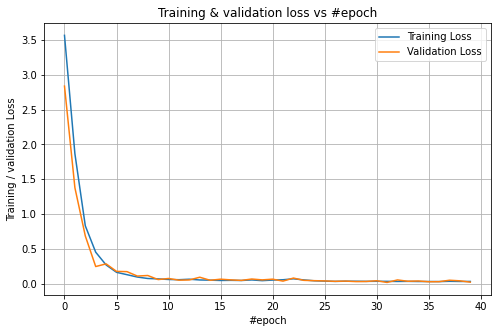

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(NUM_EPOCHS), train_loss_TL, label='Training Loss')
plt.plot(range(NUM_EPOCHS), val_loss_TL, label='Validation Loss')
plt.title('Training & validation loss vs #epoch')
plt.xlabel('#epoch')
plt.ylabel('Training / validation Loss')
plt.legend()
plt.grid()

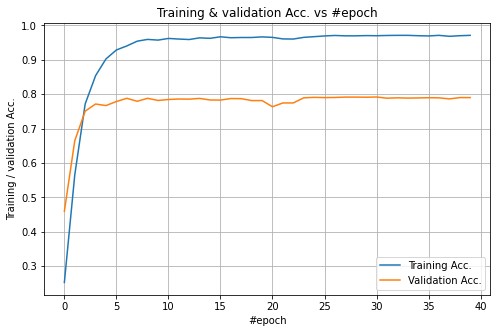

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(NUM_EPOCHS), train_acc_TL, label='Training Acc.')
plt.plot(range(NUM_EPOCHS), val_acc_TL, label='Validation Acc.')
plt.title('Training & validation Acc. vs #epoch')
plt.xlabel('#epoch')
plt.ylabel('Training / validation Acc.')
plt.legend()
plt.grid()

### 3. Data Aggumentaion:

In [10]:
agg_dataset = tr_dataset
train_transform_agg = [train_transform_agg1,train_transform_agg2,train_transform_agg3,train_transform_agg4,train_transform_agg5]
for i in train_transform_agg:
  train_dataset = Caltech(DATA_DIR,split='train',transform=i)
  train , val = train_val_split(train_dataset,0.5)
  agg_dataset = ConcatDataset([train, agg_dataset])

In [11]:
len(agg_dataset)

17358

In [12]:
train_agg_dataloader = DataLoader(agg_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)

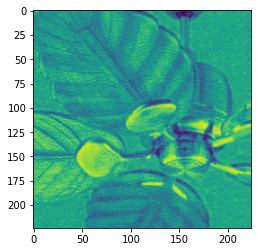

In [13]:
i,j, t,s = agg_dataset.__getitem__(600+4*2893)
plt.imshow(i.numpy()[0])

In [14]:
net = alexnet(pretrained=True) # Loading AlexNet model
#net_TL = alexnet(pretrained=True)
# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes
# We need 101 outputs for Caltech-101
net.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer
                                                 # The convolutional layer is nn.Conv2d

#=========================================================================================================================

# Define loss function
criterion = nn.CrossEntropyLoss() # for classification, we use Cross Entropy

# Choose parameters to optimize
# To access a different set of parameters, you have to access submodules of AlexNet
# (nn.Module objects, like AlexNet, implement the Composite Pattern)
# e.g.: parameters of the fully connected layers: net.classifier.parameters()
# e.g.: parameters of the convolutional layers: look at alexnet's source code ;) 
parameters_to_optimize = net.parameters() # In this case we optimize over all the parameters of AlexNet

# Define optimizer
# An optimizer updates the weights based on loss
# We use SGD with momentum
optimizer = optim.SGD(parameters_to_optimize, lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

# Define scheduler
# A scheduler dynamically changes learning rate
# The most common schedule is the step(-down), which multiplies learning rate by gamma every STEP_SIZE epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

#=========================================================================================================================

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
# By default, everything is loaded to cpu
net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda

cudnn.benchmark # Calling this optimizes runtime
NUM_EPOCHS = 20
current_step = 0
running_corrects_tr = 0
running_corrects_val = 0

train_loss_TL = []
train_acc_TL = []
val_loss_TL = []
val_acc_TL = []

# Start iterating over the epochs
for epoch in range(NUM_EPOCHS):
  epoch_loss_tr = []
  epoch_loss_val = []
  running_corrects_tr = 0
  running_corrects_val = 0
  
  print('Starting epoch {}/{}, LR = {}'.format(epoch+1, NUM_EPOCHS, scheduler.get_lr()))

  # Iterate over the dataset
  net = net.to(DEVICE)
  net.train()
  for images, labels, path, target  in train_agg_dataloader: 
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    net.train() 
    optimizer.zero_grad() 
    outputs = net(images)
    loss = criterion(outputs, labels)

    # Compute gradients for each layer and update weights
    loss.backward()  # backward pass: computes gradients
    optimizer.step() # update weights based on accumulated gradients

    epoch_loss_tr.append(loss.item())

    _, preds = torch.max(outputs.data, 1)
    running_corrects_tr += torch.sum(preds == labels.data).data.item()

  train_loss_TL.append(sum(epoch_loss_tr)/len(epoch_loss_tr))
  train_acc_TL.append(running_corrects_tr/float(len(agg_dataset)))

  net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda
  net.train(False) # Set Network to evaluation mode

  for images, labels, path, target  in val_dataloader:
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)
    # Forward Pass
    outputs = net(images)
    # loss calculation:
    epoch_loss_val.append(loss.item())
    # Get predictions
    _, preds = torch.max(outputs.data, 1)
    # Update Corrects
    running_corrects_val += torch.sum(preds == labels.data).data.item()
  # Calculate Loss & Accuracy per epoch:
  val_loss_TL.append(sum(epoch_loss_val)/len(epoch_loss_val))
  val_acc_TL.append(running_corrects_val / float(len(val_dataset)))

  print('Train: Loss = {} , Accuracy = {}'.format( (sum(epoch_loss_tr)/len(epoch_loss_tr)) , (running_corrects_tr/float(len(agg_dataset))) ))
  print('Validation: Loss = {} , Accuracy = {}'.format( (sum(epoch_loss_val)/len(epoch_loss_val)) , (running_corrects_val/float(len(val_dataset))) ))
  # Step the scheduler
  scheduler.step() 

Starting epoch 1/20, LR = [0.001]
Train: Loss = 1.5364403824011486 , Accuracy = 0.6386680493144371
Validation: Loss = 0.532474160194397 , Accuracy = 0.7689380837080595
Starting epoch 2/20, LR = [0.001]


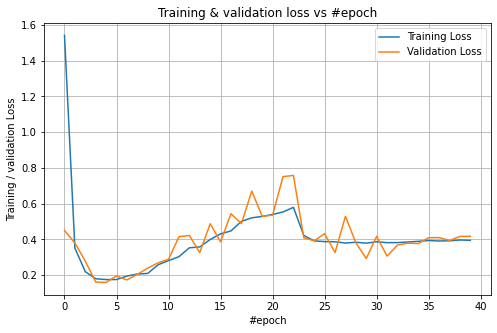

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(NUM_EPOCHS), train_loss_TL, label='Training Loss')
plt.plot(range(NUM_EPOCHS), val_loss_TL, label='Validation Loss')
plt.title('Training & validation loss vs #epoch')
plt.xlabel('#epoch')
plt.ylabel('Training / validation Loss')
plt.legend()
plt.grid()

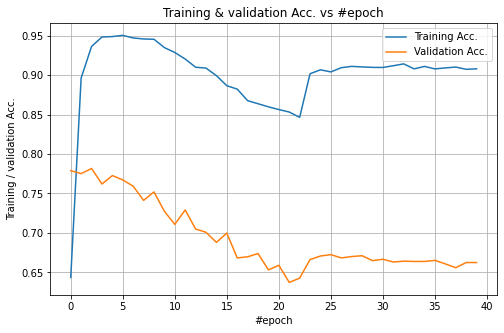

In [25]:
plt.figure(figsize=(8,5))
plt.plot(range(NUM_EPOCHS), train_acc_TL, label='Training Acc.')
plt.plot(range(NUM_EPOCHS), val_acc_TL, label='Validation Acc.')
plt.title('Training & validation Acc. vs #epoch')
plt.xlabel('#epoch')
plt.ylabel('Training / validation Acc.')
plt.legend()
plt.grid()

### Test:

In [1]:
net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda
net.train(False) # Set Network to evaluation mode

running_corrects = 0
for images, labels, path, target in tqdm(test_dataloader):
  images = images.to(DEVICE)
  labels = labels.to(DEVICE)

  # Forward Pass
  outputs = net(images)

  # Get predictions
  _, preds = torch.max(outputs.data, 1)

  # Update Corrects
  running_corrects += torch.sum(preds == labels.data).data.item()

# Calculate Accuracy
accuracy = running_corrects / float(len(test_dataset))

print('Test Accuracy: {}'.format(accuracy))

NameError: ignored

# Tensorflow

In [ ]:
import os
import urllib.request
from tensorflow.keras import layers, Model 
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator    
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from tensorflow.python.framework import ops
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Here I have used the data loader of pytorch and append it to new file for the data generator of tensorflow
# Clone github repository with data
if not os.path.isdir('./Caltech101'):
  !git clone https://github.com/KhaledAlamin/HW2_Caltech101
  !mv 'HW2_Caltech101' 'Caltech101'

for i,j,k, target in train_dataset:
    currentpath = k
    if not os.path.exists('./tensorflow/train/' + target):
        newpathandname = os.makedirs('tensorflow/train/' + target + '/') 
    newpathandname = './tensorflow/train/' + target + '/'
    shutil.copy(currentpath, newpathandname) # keeps original file

for i,j,k, target in val_dataset:
    currentpath = k
    if not os.path.exists('./tensorflow/valid/' + target):
        newpathandname = os.makedirs('tensorflow/valid/' + target + '/') 
    newpathandname = './tensorflow/valid/' + target + '/'
    shutil.copy(currentpath, newpathandname) # keeps original file


local_weights_file = './tensorflow/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

urllib.request.urlretrieve(url, local_weights_file)
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    # pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './tensorflow/train/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './tensorflow/valid/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(101, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr= 0.001),
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=23,  
      epochs=40,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=23)

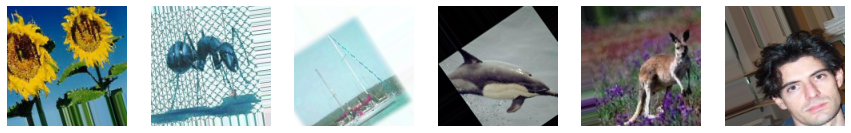

In [ ]:
x= train_generator
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,15))
for i in range(0,6):
    
    image = x[0][0][i]
    ax[i].imshow(image)
    ax[i].axis('off')

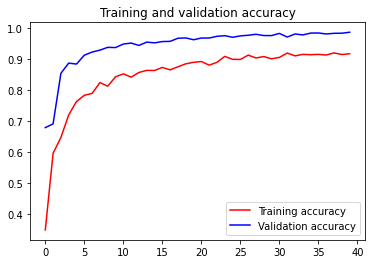

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].title('Training and validation accuracy')
ax[0].legend(loc=0)
ax[0].figure()

ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].title('Training and validation loss')
ax[1].legend(loc=0)
ax[1].figure()


ax.show()

In [ ]:
for i,j,k, target in test_dataset:
    currentpath = k
    if not os.path.exists('./tensorflow/test/' + target):
        newpathandname = os.makedirs('tensorflow/test/' + target + '/') 
    newpathandname = './tensorflow/test/' + target + '/'
    shutil.copy(currentpath, newpathandname) # keeps original file

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 128 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        './tensorflow/test/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

model.evaluate_generator(test_generator)

Model could predice the image as: bass
[[1.0411712e-26 6.9761130e-33 2.9299458e-33 1.8480018e-23 5.5859595e-31
  1.0000000e+00 2.0001777e-25 1.8381011e-32 5.1416320e-31 5.3236074e-27
  8.7894820e-33 3.0888965e-25 2.8442002e-27 2.4882316e-36 4.4231598e-23
  5.9629761e-27 1.0938208e-28 7.1794277e-27 1.1564267e-25 6.2860880e-26
  4.2746929e-24 2.9571117e-23 3.9436679e-17 5.9744288e-27 8.3307286e-27
  1.5725885e-33 5.0875039e-26 5.2769155e-22 1.5936367e-30 5.7270368e-28
  1.4069217e-22 1.1556632e-26 6.8118988e-37 1.3508935e-22 7.0087991e-30
  4.7921003e-19 1.9437864e-24 2.1952542e-28 1.7691270e-26 8.2617364e-27
  7.2991420e-26 3.4114435e-21 1.9067500e-24 7.6648270e-34 6.3866493e-30
  2.8370406e-25 3.4723315e-17 9.5090509e-28 5.6080367e-31 0.0000000e+00
  5.2584766e-19 1.5758100e-22 5.4520586e-19 3.0997499e-29 5.7022012e-30
  6.4353953e-21 3.8974989e-25 3.2842956e-29 3.1403212e-23 1.5597759e-22
  1.6279134e-26 1.0819124e-25 1.0316954e-24 8.3889378e-32 9.1974003e-24
  2.6154608e-24 5.5045991

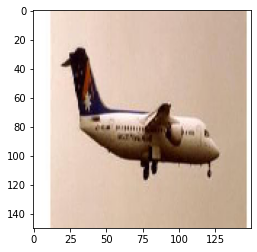

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
#uploaded = files.upload()
#for fn in uploaded.keys():
# predicting images
path = './tensorflow/test/a'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
plt.imshow(x/255.)
#  x = np.expand_dims(x, axis=0) /255.
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes.shape)
pred = np.argmax(classes,axis=1)
for i,j,k,t in test_dataset:
  if np.squeeze(np.array(j)) == np.squeeze(pred):
    print("Model could predice the image as:", t)
    break